In [10]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Data preprocessing
con = sqlite3.connect('features.db')
df = pd.read_sql_query("SELECT * FROM features", con)
df = df.drop(columns=['Registered', 'Expiration'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Url            2500 non-null   object 
 1   HttpStatus     2500 non-null   int64  
 2   Entropy        2500 non-null   float64
 3   NumberDigits   2500 non-null   int64  
 4   UrlLength      2500 non-null   int64  
 5   NumParams      2500 non-null   int64  
 6   NumFragments   2500 non-null   int64  
 7   NumSubdomains  2500 non-null   int64  
 8   Extensions     2500 non-null   object 
 9   Label          2500 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 195.4+ KB


In [11]:

# convert urls to numbers
url_dict = {url: i for i,url in enumerate(df['Url'])}
url_vocab = df['Url']
url_dict2 = {}
count = 0
for u in url_vocab:
  url_dict2[u] = count
  count += 1
  

In [12]:
def integer_encode_url(url):
  return url_dict[url]

In [13]:
df['Url'] = df['Url'].apply(integer_encode_url)
df

,Url,HttpStatus,Entropy,NumberDigits,UrlLength,NumParams,NumFragments,NumSubdomains,Extensions,Label
0,0,200,-3.681881,0,19,0,0,0,com,0
1,1,200,-3.852169,0,17,0,0,0,com,0
2,2,404,-3.375000,0,16,0,0,0,com,0
3,3,200,-3.419382,0,18,0,0,0,com,0
4,4,200,-3.454822,0,17,0,0,0,com,0
...,...,...,...,...,...,...,...,...,...,...
2495,2495,404,-4.106718,0,41,0,0,1,com,1
2496,2496,404,-5.638953,55,467,0,0,2,com,1
2497,2497,404,-4.845627,22,94,2,0,1,php?&sessionid=f01f18eaec89816094bc3868f662d23...,1
2498,2498,404,-4.541885,0,74,2,0,1,php?&sessionid=$hash&securessl=true,1


In [14]:
#Convert extensions to strings
ext_dict = {ext: i for i,ext in enumerate(df['Extensions'].unique())}
ext_vocab = df['Extensions'].unique()
ext_dict2 = {}
total = 0
for u in ext_vocab:
  ext_dict2[u] = total
  total+=1
  

In [15]:
def integer_encode_extension(ext):
  return ext_dict[ext]

In [16]:
df['Extensions'] = df['Extensions'].apply(integer_encode_extension)


In [17]:
df['Extensions']

0         0
1         0
2         0
3         0
4         0
       ... 
2495      0
2496      0
2497    320
2498    109
2499      0
Name: Extensions, Length: 2500, dtype: int64

In [18]:
# need to generate training and test sets
'''
I think that we should set y to something else: we dont want to train based on the label we want to train based on the other features
'''
feature_cols = ['Entropy','UrlLength','HttpStatus','NumberDigits','NumParams','NumFragments']
print(df[feature_cols])
X = df[feature_cols]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

       Entropy  UrlLength  HttpStatus  NumberDigits  NumParams  NumFragments
0    -3.681881         19         200             0          0             0
1    -3.852169         17         200             0          0             0
2    -3.375000         16         404             0          0             0
3    -3.419382         18         200             0          0             0
4    -3.454822         17         200             0          0             0
...        ...        ...         ...           ...        ...           ...
2495 -4.106718         41         404             0          0             0
2496 -5.638953        467         404            55          0             0
2497 -4.845627         94         404            22          2             0
2498 -4.541885         74         404             0          2             0
2499 -4.027233         67         404             0          0             0

[2500 rows x 6 columns]


In [19]:
y_train

1181    0
372     0
137     0
1831    1
2296    1
       ..
960     0
905     0
1096    0
235     0
1061    0
Name: Label, Length: 1750, dtype: int64

X Test
       Entropy  UrlLength  HttpStatus  NumberDigits  NumParams  NumFragments
1406 -3.667838         32         404             0          0             0
297  -3.836592         18         404             0          0             0
1276 -4.208713         49         404             4          0             0
2368 -4.263982         50         404             1          0             0
438  -3.521641         14         404             0          0             0
...        ...        ...         ...           ...        ...           ...
2209 -5.497765        234         404            47          1             0
1269 -4.239525         49         404             3          0             0
1230 -4.053661         25         404             0          0             0
743  -3.235926         14         404             0          0             0
2338 -4.160117         53         404             0          0             0

[750 rows x 6 columns]
Accuracy: 0.9426666666666667
F1 score: 0.9422

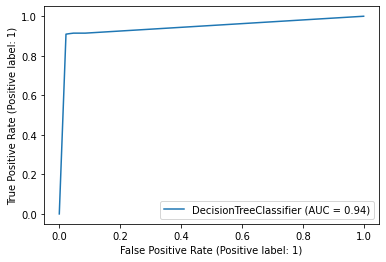

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset

y_pred = clf.predict(X_test)
'''
while(True):
  #pull one row from NETWORK DB

  # packet -> URL gen script -> Feature Extractor -> Network DB -> ML Model -> Combo DB -> Correlator

  y_pred = clf.predict(#DBentry)
'''


print("X Test")
print(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Obviously want to be 1.0
print("F1 score:",metrics.f1_score(y_test,y_pred))        #Also want to be 1.0
print("Log Loss:",metrics.log_loss(y_test,y_pred))        #This means our prbability diverges quite a bit from the actual value
print("Average precision:",metrics.average_precision_score(y_test,y_pred))
print("AUC of ROC:", metrics.roc_auc_score(y_test,y_pred))

metrics.plot_roc_curve(clf,X_test,y_test)

#print(y_pred)
#print(y_test)


In [21]:
import pickle 
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

In [55]:
#Add all predications and times to db
import datetime
import sqlite3

con = sqlite3.connect('predictions.db', isolation_level='DEFERRED')
cursor = con.cursor()
cursor.execute('CREATE TABLE IF NOT EXISTS PREDICTIONS(Prediction TEXT, Time TEXT)')
for x, value in enumerate(y_pred):
  time = datetime.datetime(2021, 5, 17, 9, 0, 0)
  time_change = datetime.timedelta(minutes=x)
  new_time = time+time_change
  pred_time = new_time.strftime("%H:%M:%S")
  cursor.execute('INSERT INTO PREDICTIONS (Prediction, Time) values(?,?)', (str(value), pred_time))
  con.commit()
  #pred_w_time_list.append([value, pred_time])

con.close()

In [56]:
'''
Having issues running this locally, commented out
print decision tree
'''
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('decisions.png')
# Image(graph.create_png())


'\nHaving issues running this locally, commented out\nprint decision tree\n'